<h1> Objective:- Assessment Task 7.2C: Speech enhancement </h1>

<div style="text-align: right"> Done by: <b>Karan Murjani </b> </div>
<div style="text-align: right"> StudentId: <b> 221047083 </b></div>

### 1. Filtering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from pydub import AudioSegment
from pydub.utils import mediainfo
from scipy import signal
import array
import pydub
from pydub import AudioSegment

In [2]:
noisy_speech = AudioSegment.from_wav('NoisySignal/Station/sp01_station_sn5.wav')
noisy_s = noisy_speech.get_array_of_samples()
noisy_f = noisy_speech.frame_rate

Text(0, 0.5, 'Amplitude')

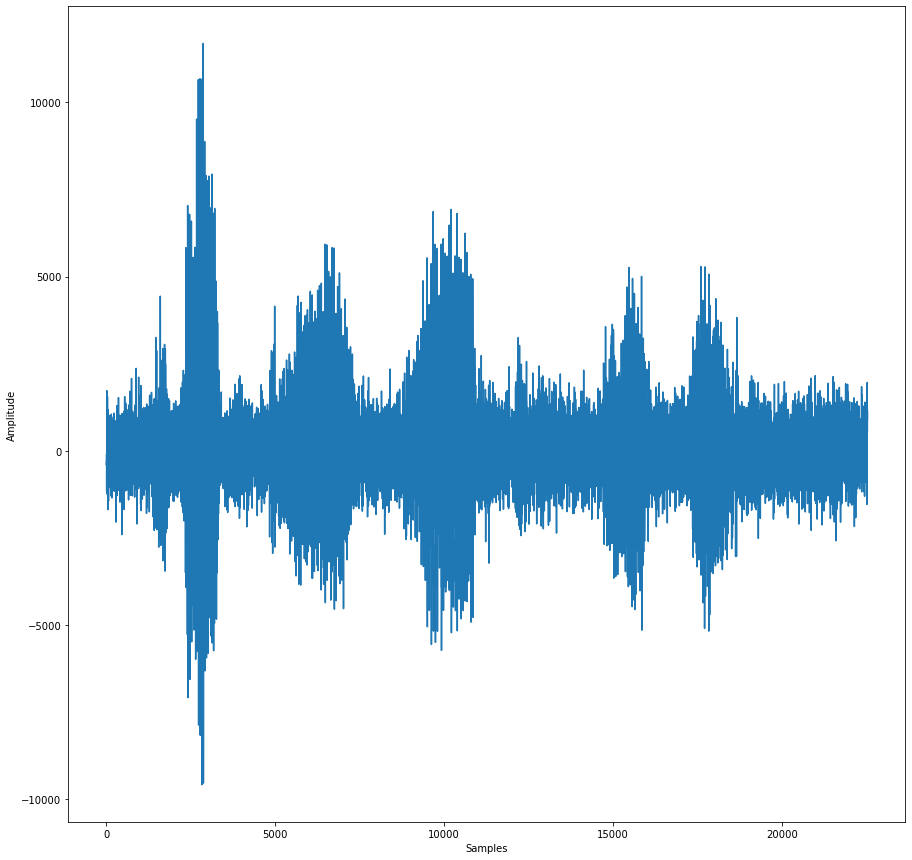

In [3]:
plt.figure(figsize = (15, 15))
plt.plot(noisy_s)
plt.xlabel('Samples')
plt.ylabel('Amplitude')

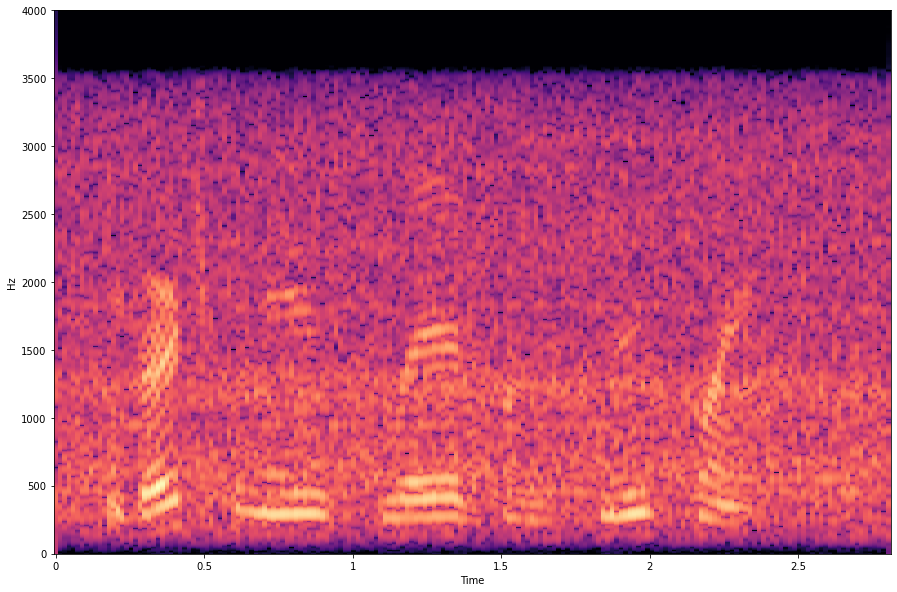

In [4]:
#range of frequencies of interest for speech signal. It can be any positive value, but should be a power of 2
freq_range = 2048
#window size: the number of samples per frame. each frame is of 30ms
win_length = int(noisy_f * 0.03)
#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)
#windowing technique
window = 'hann'
noisy_S = librosa.stft(np.float32(noisy_s),
                       n_fft = freq_range, 
                       window = window,
                       hop_length = hop_length,
                       win_length = win_length)

plt.figure(figsize = (15, 10))
#convert the amplitude to decibels, just for illustration purpose
noisy_Sdb = librosa.amplitude_to_db(abs(noisy_S))
librosa.display.specshow(
                        #spectrogram
                        noisy_Sdb,
                        #sampling rate
                        sr = noisy_f,
                        #label for horizontal axis
                        x_axis = 'time',
                        #presentation scale
                        y_axis = 'linear',
                        #hop_lenght
                        hop_length = hop_length)

In [5]:
#order
order = 10
#sampling frequency
sampling_freq = noisy_f
#cut-off frequency. This can be an array if band-pass filter is used
#this must be within 0 and cutoff_freq/2
cutoff_freq = 1000
#filter type, e.g., 'lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’
filter_type = 'lowpass'
#filter
h = signal.butter(N = order,
                  fs = sampling_freq,
                  Wn = cutoff_freq,
                  btype = filter_type,
                  analog = False,
                  output = 'sos')

In [6]:
filtered_s = signal.sosfilt(h, noisy_s)

In [7]:
filtered_s_audio = pydub.AudioSegment(
                #raw data
                data = array.array(noisy_speech.array_type, np.float16(filtered_s)),
                #2 bytes = 16 bit samples
                sample_width = 2,
                #frame rate
                frame_rate = noisy_f,
                #channels = 1 for mono and 2 for stereo
                channels = 1)
filtered_s_audio.export('sp01_station_sn5_lowpass.wav', format = 'wav')

<ipython-input-7-9e3af24f22cd>:3: DeprecationWarning: an integer is required (got type numpy.float16).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  data = array.array(noisy_speech.array_type, np.float16(filtered_s)),


<_io.BufferedRandom name='sp01_station_sn5_lowpass.wav'>

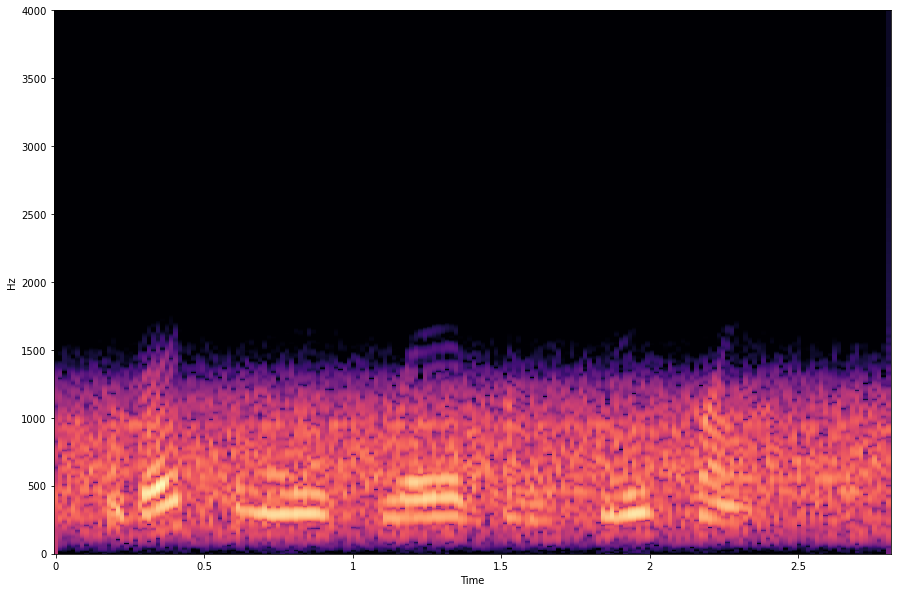

In [8]:
#range of frequencies of interest for speech signal. It can be any positive value, but should be a power of 2
freq_range = 2048

#window size: the number of samples per frame. Each frame is of 30ms
win_length = int(noisy_f * 0.03)

#number of samples between two consecutive frames by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

#windowing technique
window = 'hann'

filtered_S = librosa.stft(np.float32(filtered_s),
                       n_fft = freq_range,
                       window = window,
                       hop_length = hop_length,
                       win_length = win_length)

plt.figure(figsize = (15, 10))

#convert the amplitude to decibels, just for illustration purpose
filtered_Sdb = librosa.amplitude_to_db(abs(filtered_S))

librosa.display.specshow(
    #spectrogram
    filtered_Sdb,
    
    #sampling rate
    sr = noisy_f,
    
    #label for horizontal axis
    x_axis = 'time',

    #presentation scale
    y_axis = 'linear',

    #hop_lenght
    hop_length = hop_length)

### 1. Implement a high-pass filter with a cut-off frequency = 200Hz using Butterworth filter. You can use the same parameter settings used in the previous low-pass filter. Hint: In signal.butter, set Wn = 200, btype = 'highpass'.

In [9]:
#order
order = 10
#sampling frequency
sampling_freq = noisy_f
#cut-off frequency. This can be an array if band-pass filter is used
#this must be within 0 and cutoff_freq/2
cutoff_freq = 200
#filter type, e.g., 'lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’
filter_type = 'highpass'
#filter
h = signal.butter(N = order,
                  fs = sampling_freq,
                  Wn = cutoff_freq,
                  btype = filter_type,
                  analog = False,
                  output = 'sos')

high_pass_filtered_s = signal.sosfilt(h, noisy_s)

filtered_s_audio = pydub.AudioSegment(
                #raw data
                data = array.array(noisy_speech.array_type, np.float16(high_pass_filtered_s)),
                #2 bytes = 16 bit samples
                sample_width = 2,
                #frame rate
                frame_rate = noisy_f,
                #channels = 1 for mono and 2 for stereo
                channels = 1)
filtered_s_audio.export('sp01_station_sn5_highpass.wav', format = 'wav')

<ipython-input-9-904e6d21b7dd>:22: DeprecationWarning: an integer is required (got type numpy.float16).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  data = array.array(noisy_speech.array_type, np.float16(high_pass_filtered_s)),


<_io.BufferedRandom name='sp01_station_sn5_highpass.wav'>

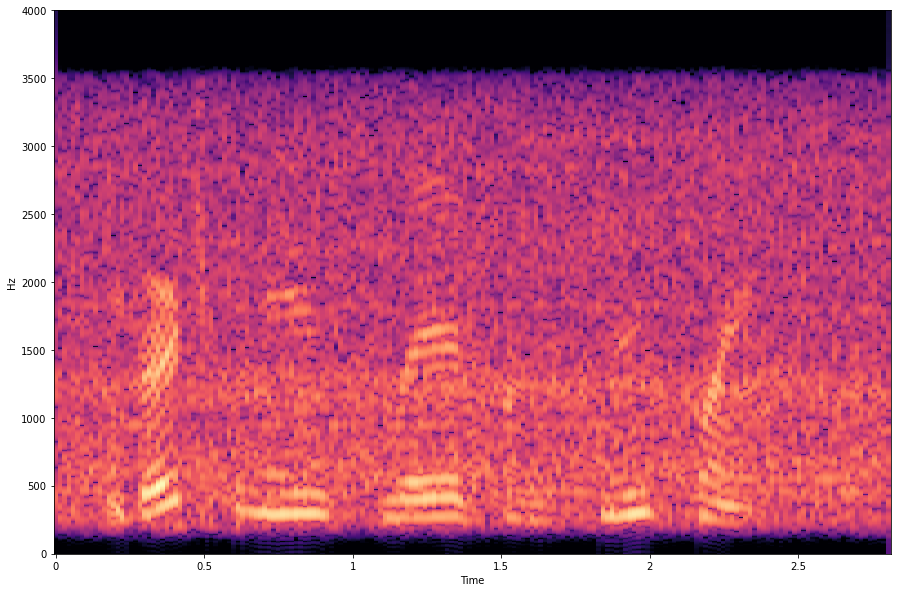

In [10]:
#range of frequencies of interest for speech signal. It can be any positive value, but should be a power of 2
freq_range = 2048

#window size: the number of samples per frame. Each frame is of 30ms
win_length = int(noisy_f * 0.03)

#number of samples between two consecutive frames by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

#windowing technique
window = 'hann'

high_pass_filtered_S = librosa.stft(np.float32(high_pass_filtered_s),
                       n_fft = freq_range,
                       window = window,
                       hop_length = hop_length,
                       win_length = win_length)

plt.figure(figsize = (15, 10))

#convert the amplitude to decibels, just for illustration purpose
high_pass_filtered_sdb = librosa.amplitude_to_db(abs(high_pass_filtered_S))

librosa.display.specshow(
    #spectrogram
    high_pass_filtered_sdb,
    
    #sampling rate
    sr = noisy_f,
    
    #label for horizontal axis
    x_axis = 'time',

    #presentation scale
    y_axis = 'linear',

    #hop_length
    hop_length = hop_length)

### 2. Implement a band-pass filter with a pass band = [200Hz, 1000Hz] using Butterworth filter. You can use the same parameter settings used in the previous low-pass filter. Hing: In signal.butter, set Wn = [200, 1000], btype = 'bandpass'.

In [11]:
#order
order = 10
#sampling frequency
sampling_freq = noisy_f
#cut-off frequency. This can be an array if band-pass filter is used
#this must be within 0 and cutoff_freq/2
cutoff_freq = [200, 1000] 
#filter type, e.g., 'lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’
filter_type = 'bandpass'
#filter
h = signal.butter(N = order,
                  fs = sampling_freq,
                  Wn = cutoff_freq,
                  btype = filter_type,
                  analog = False,
                  output = 'sos')

band_pass_filtered_s = signal.sosfilt(h, noisy_s)

filtered_s_audio = pydub.AudioSegment(
                #raw data
                data = array.array(noisy_speech.array_type, np.float16(band_pass_filtered_s)),
                #2 bytes = 16 bit samples
                sample_width = 2,
                #frame rate
                frame_rate = noisy_f,
                #channels = 1 for mono and 2 for stereo
                channels = 1)
filtered_s_audio.export('sp01_station_sn5_bandpass.wav', format = 'wav')

<ipython-input-11-2ab4a5ce15ce>:22: DeprecationWarning: an integer is required (got type numpy.float16).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  data = array.array(noisy_speech.array_type, np.float16(band_pass_filtered_s)),


<_io.BufferedRandom name='sp01_station_sn5_bandpass.wav'>

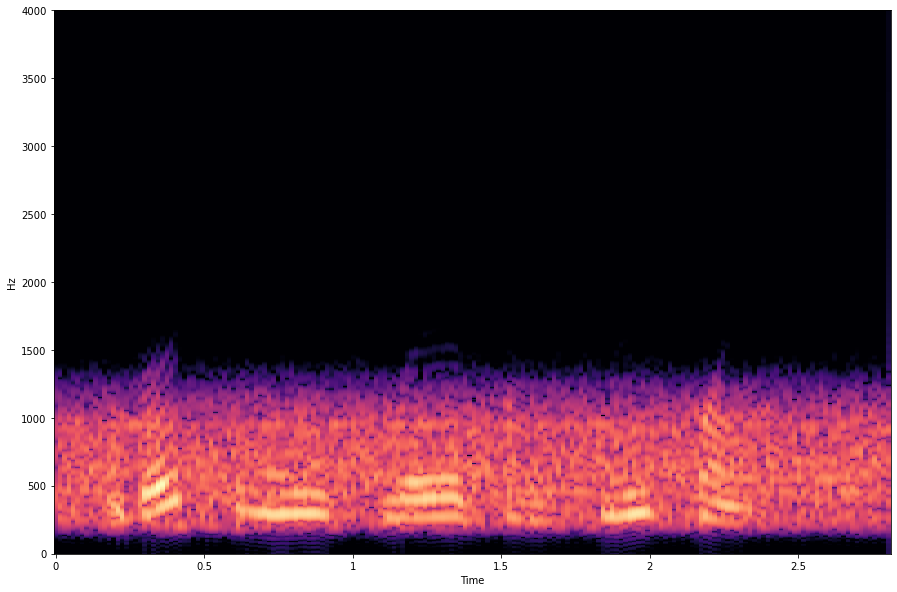

In [12]:
#range of frequencies of interest for speech signal. It can be any positive value, but should be a power of 2
freq_range = 2048

#window size: the number of samples per frame. Each frame is of 30ms
win_length = int(noisy_f * 0.03)

#number of samples between two consecutive frames by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

#windowing technique
window = 'hann'

band_pass_filtered_S = librosa.stft(np.float32(band_pass_filtered_s),
                       n_fft = freq_range,
                       window = window,
                       hop_length = hop_length,
                       win_length = win_length)

plt.figure(figsize = (15, 10))

#convert the amplitude to decibels, just for illustration purpose
band_pass_filtered_Sdb = librosa.amplitude_to_db(abs(band_pass_filtered_S))

librosa.display.specshow(
    #spectrogram
    band_pass_filtered_Sdb,
    
    #sampling rate
    sr = noisy_f,
    
    #label for horizontal axis
    x_axis = 'time',

    #presentation scale
    y_axis = 'linear',

    #hop_lenght
    hop_length = hop_length)

### 2. Noise attenuation

In [13]:
# Read audio data from file
noisy_speech = AudioSegment.from_wav('NoisySignal/Station/sp01_station_sn5.wav')
y = noisy_speech.get_array_of_samples()  # samples x(t)
y_f = noisy_speech.frame_rate  # sampling rate f - see slide 24 in week 7 lecture slides
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(y_f * 0.03)
#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)
Y = librosa.stft(np.float32(y),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)
mag_Y = abs(Y)

#### 1. Implement d, D, and mag_D

In [14]:
noise_data = AudioSegment.from_wav('Noise/Station/Station_1.wav')
d = noise_data.get_array_of_samples() # samples d(t)
d_f = noise_data.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides

#window size: the number of samples per frame each frame is of 30ms
win_length = int(d_f * 0.03)

#number of samples between two consecutive frames by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

D = librosa.stft(np.float32(d),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_D = abs(D)
square_mag_D = mag_D * mag_D

In [15]:
means_square_mag_D = np.mean(square_mag_D, axis = 1)

#### 2. Implement the Fourier transform H (see Eq (19), slide 64 in week 7 slides)

In [16]:
H = np.zeros((mag_Y.shape[0], mag_Y.shape[1]), np.float32)
for k in range(H.shape[0]):
    for t in range(H.shape[1]):
        H[k][t] = np.sqrt(max(0, 1 - means_square_mag_D[k] / (mag_Y[k][t] * mag_Y[k][t])))

#### 3. Estimate the Fourier transform S_hat

In [17]:
S_hat = H * Y

In [18]:
win_length = int(y_f * 0.03)
hop_length = int(win_length / 2)
s_hat = librosa.istft(S_hat, win_length=win_length, hop_length=hop_length, length=len(y))

#### 4. Get the inverse of S_hat to retrieve s_hat, then save s_hat to file named sp01_station_sn5_spectralsubtraction.wav

In [19]:
s_hat_truncated = np.float16(s_hat)
for i, num in enumerate(s_hat_truncated):
    if num > 32767:
        s_hat_truncated[i] = 32767
    elif num < -32768:
        s_hat_truncated[i] = -32768

In [20]:
data = array.array('h', s_hat_truncated)

<ipython-input-20-5f09c0e24e0a>:1: DeprecationWarning: an integer is required (got type numpy.float16).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  data = array.array('h', s_hat_truncated)


In [21]:
data_audio = AudioSegment(
    #raw data
    data = data,
    
    #2 bytes = 16 bit samples
    sample_width = 2,
    
    #frame rate
    frame_rate = y_f,
    
    #channels = 1 for mono and 2 for stereo
    channels = 1)

data_audio.export('sp01_station_sn5_spectralsubtraction.wav', format = 'wav')

<_io.BufferedRandom name='sp01_station_sn5_spectralsubtraction.wav'>

#### 6. Visualise the spectrogram of sp01_station_sn5_spectralsubtraction.wav, i.e., S_hat

In [22]:
shat_s = data_audio.get_array_of_samples() # samples x(t)
shat_f = data_audio.frame_rate

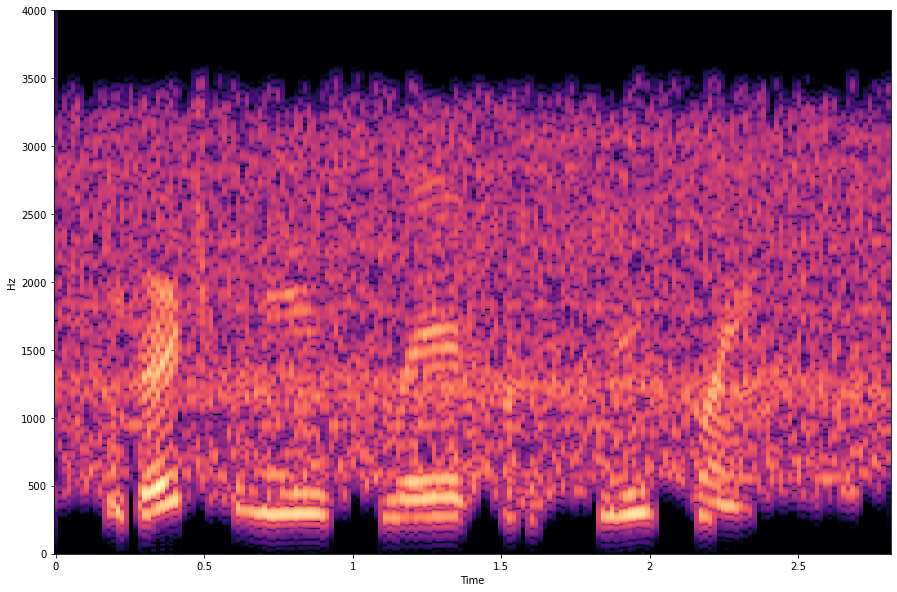

In [23]:
#range of frequencies of interest for speech signal. It can be any positive value, but should be a power of 2
freq_range = 2048

#window size: the number of samples per frame. Each frame is of 30ms
win_length = int(shat_f * 0.03)

#number of samples between two consecutive frames by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

#windowing technique
window = 'hann'

shat_S = librosa.stft(np.float32(shat_s),
                       n_fft = freq_range,
                       window = window,
                       hop_length = hop_length,
                       win_length = win_length)

plt.figure(figsize = (15, 10))

#convert the amplitude to decibels, just for illustration purpose
shat_Sdb = librosa.amplitude_to_db(abs(shat_S))

librosa.display.specshow(
    #spectrogram
    shat_Sdb,
    
    #sampling rate
    sr = shat_f,
    
    #label for horizontal axis
    x_axis = 'time',

    #presentation scale
    y_axis = 'linear',

    #hop_lenght
    hop_length = hop_length)

#### Visualise the  spectrogram of the clean signal in CleanSignal/sp01.wav

In [24]:
cleanData = AudioSegment.from_wav('CleanSignal/sp01.wav')
clean_s = cleanData.get_array_of_samples()
clean_f = cleanData.frame_rate

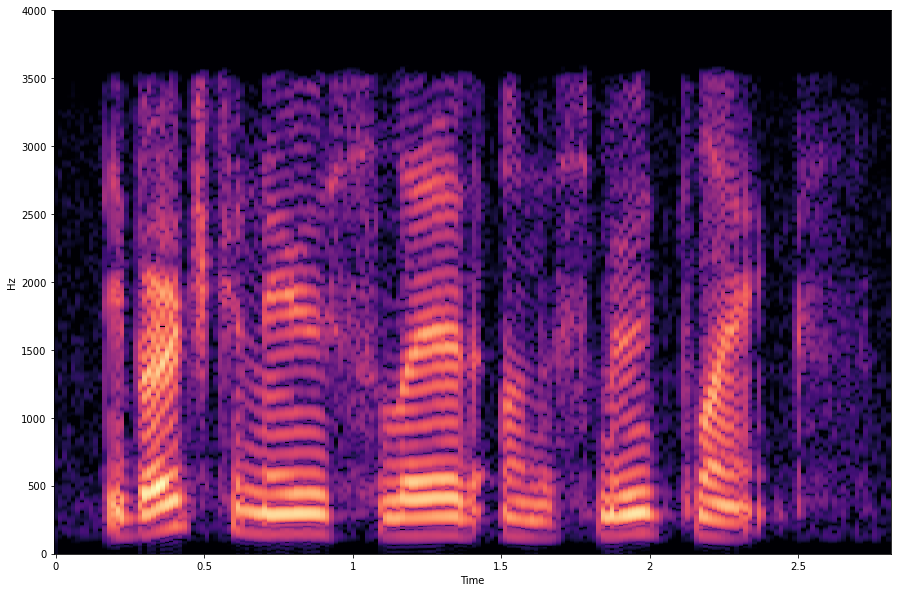

In [25]:
#range of frequencies of interest for speech signal. It can be any positive value, but should be a power of 2
freq_range = 2048

#window size: the number of samples per frame. Each frame is of 30ms
win_length = int(clean_f * 0.03)

#number of samples between two consecutive frames by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

#windowing technique
window = 'hann'

clean_S = librosa.stft(np.float32(clean_s),
                       n_fft = freq_range,
                       window = window,
                       hop_length = hop_length,
                       win_length = win_length)

plt.figure(figsize = (15, 10))

#convert the amplitude to decibels, just for illustration purpose
clean_Sdb = librosa.amplitude_to_db(abs(clean_S))

librosa.display.specshow(
    #spectrogram
    clean_Sdb,
    
    #sampling rate
    sr = clean_f,
    
    #label for horizontal axis
    x_axis = 'time',

    #presentation scale
    y_axis = 'linear',

    #hop_lenght
    hop_length = hop_length)

#### Spectral subtraction alogrithm - sp02_station_sn5

In [26]:
noisy_data1 = AudioSegment.from_wav('NoisySignal/Station/sp02_station_sn5.wav')
d1 = noisy_data1.get_array_of_samples() # samples d(t)
d_f1 = noisy_data1.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides

#window size: the number of samples per frame each frame is of 30ms
win_length = int(d_f1 * 0.03)

#number of samples between two consecutive frames by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

D1 = librosa.stft(np.float32(d1),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_D1 = abs(D1)
square_mag_D1 = mag_D1 * mag_D1

In [27]:
means_square_mag_D1 = np.mean(square_mag_D1, axis = 1)

In [28]:
H1 = np.zeros((mag_Y.shape[0], mag_Y.shape[1]), np.float32)
for k in range(H1.shape[0]):
    for t in range(H1.shape[1]):
        H1[k][t] = np.sqrt(max(0, 1 - means_square_mag_D1[k] / (mag_Y[k][t] * mag_Y[k][t])))

In [29]:
S_hat1 = H1 * Y

In [30]:
win_length = int(y_f * 0.03)
hop_length = int(win_length / 2)
s_hat1 = librosa.istft(S_hat1, win_length = win_length, hop_length = hop_length, length = len(y))

In [31]:
s_hat_truncated1 = np.float16(s_hat1)
for i, num in enumerate(s_hat_truncated1):
    if num > 32767:
        s_hat_truncated1[i] = 32767
    elif num < -32768:
        s_hat_truncated1[i] = -32768

In [32]:
data1 = array.array('h', s_hat_truncated1)

<ipython-input-32-759a655ce13a>:1: DeprecationWarning: an integer is required (got type numpy.float16).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  data1 = array.array('h', s_hat_truncated1)


In [33]:
data_audio1 = AudioSegment(
    #raw data
    data = data1,
    
    #2 bytes = 16 bit samples
    sample_width = 2,
    
    #frame rate
    frame_rate = y_f,
    
    #channels = 1 for mono and 2 for stereo
    channels = 1)

data_audio1.export('sp02_station_sn5_spectralsubtraction.wav', format = 'wav')

<_io.BufferedRandom name='sp02_station_sn5_spectralsubtraction.wav'>

In [34]:
shat_s1 = data_audio1.get_array_of_samples() # samples x(t)
shat_f1 = data_audio1.frame_rate

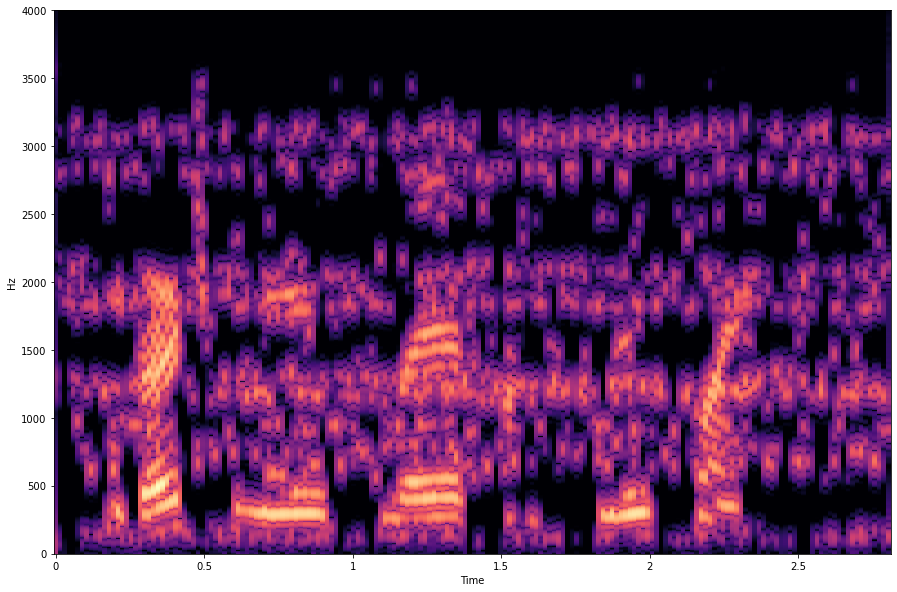

In [35]:
#range of frequencies of interest for speech signal. It can be any positive value, but should be a power of 2
freq_range = 2048

#window size: the number of samples per frame. Each frame is of 30ms
win_length = int(shat_f1 * 0.03)

#number of samples between two consecutive frames by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

#windowing technique
window = 'hann'

shat_S1 = librosa.stft(np.float32(shat_s1),
                       n_fft = freq_range,
                       window = window,
                       hop_length = hop_length,
                       win_length = win_length)

plt.figure(figsize = (15, 10))

#convert the amplitude to decibels, just for illustration purpose
shat_Sdb1 = librosa.amplitude_to_db(abs(shat_S1))

librosa.display.specshow(
    #spectrogram
    shat_Sdb1,
    
    #sampling rate
    sr = shat_f1,
    
    #label for horizontal axis
    x_axis = 'time',

    #presentation scale
    y_axis = 'linear',

    #hop_lenght
    hop_length = hop_length)

#### Spectral subtraction alogrithm - sp03_station_sn5

In [36]:
noisy_data2 = AudioSegment.from_wav('NoisySignal/Station/sp03_station_sn5.wav')
d2 = noisy_data2.get_array_of_samples() # samples d(t)
d_f2 = noisy_data2.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides

#window size: the number of samples per frame each frame is of 30ms
win_length = int(d_f2 * 0.03)

#number of samples between two consecutive frames by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

D2 = librosa.stft(np.float32(d2),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_D2 = abs(D2)
square_mag_D2 = mag_D2 * mag_D2

In [37]:
means_square_mag_D2 = np.mean(square_mag_D2, axis = 1)

In [38]:
H2 = np.zeros((mag_Y.shape[0], mag_Y.shape[1]), np.float32)
for k in range(H2.shape[0]):
    for t in range(H2.shape[1]):
        H2[k][t] = np.sqrt(max(0, 1 - means_square_mag_D2[k] / (mag_Y[k][t] * mag_Y[k][t])))

In [39]:
S_hat2 = H2 * Y

In [40]:
win_length = int(y_f * 0.03)
hop_length = int(win_length / 2)
s_hat2 = librosa.istft(S_hat2, win_length = win_length, hop_length = hop_length, length = len(y))

In [41]:
s_hat_truncated2 = np.float16(s_hat2)
for i, num in enumerate(s_hat_truncated2):
    if num > 32767:
        s_hat_truncated2[i] = 32767
    elif num < -32768:
        s_hat_truncated2[i] = -32768

In [42]:
data2 = array.array('h', s_hat_truncated2)

<ipython-input-42-b344b5c1d593>:1: DeprecationWarning: an integer is required (got type numpy.float16).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  data2 = array.array('h', s_hat_truncated2)


In [43]:
data_audio2 = AudioSegment(
    #raw data
    data = data2,
    
    #2 bytes = 16 bit samples
    sample_width = 2,
    
    #frame rate
    frame_rate = y_f,
    
    #channels = 1 for mono and 2 for stereo
    channels = 1)

data_audio2.export('sp03_station_sn5_spectralsubtraction.wav', format = 'wav')

<_io.BufferedRandom name='sp03_station_sn5_spectralsubtraction.wav'>

In [44]:
shat_s2 = data_audio2.get_array_of_samples() # samples x(t)
shat_f2 = data_audio2.frame_rate

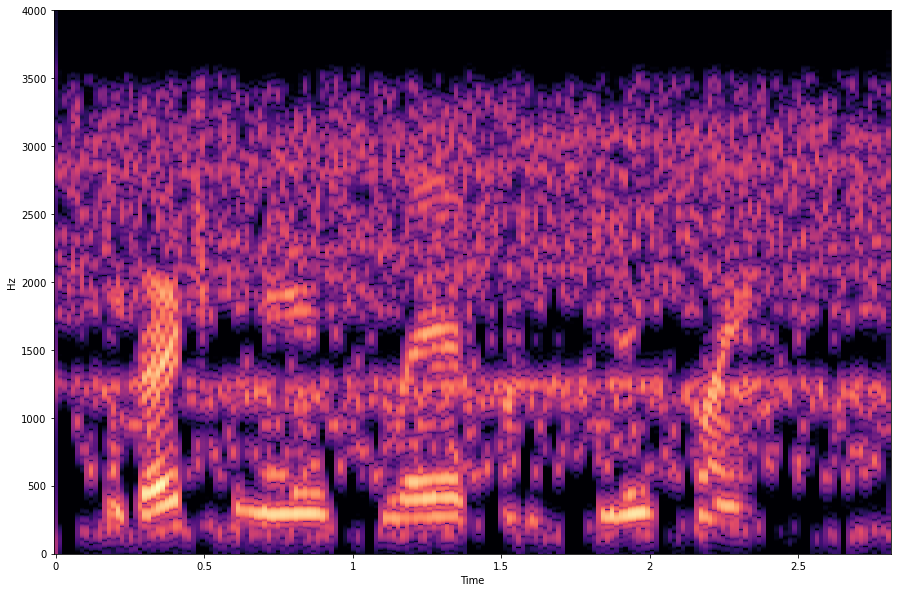

In [45]:
#range of frequencies of interest for speech signal. It can be any positive value, but should be a power of 2
freq_range = 2048

#window size: the number of samples per frame. Each frame is of 30ms
win_length = int(shat_f2 * 0.03)

#number of samples between two consecutive frames by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

#windowing technique
window = 'hann'

shat_S2 = librosa.stft(np.float32(shat_s2),
                       n_fft = freq_range,
                       window = window,
                       hop_length = hop_length,
                       win_length = win_length)

plt.figure(figsize = (15, 10))

#convert the amplitude to decibels, just for illustration purpose
shat_Sdb2 = librosa.amplitude_to_db(abs(shat_S2))

librosa.display.specshow(
    #spectrogram
    shat_Sdb2,
    
    #sampling rate
    sr = shat_f2,
    
    #label for horizontal axis
    x_axis = 'time',

    #presentation scale
    y_axis = 'linear',

    #hop_lenght
    hop_length = hop_length)

#### Spectral subtraction alogrithm - sp01_babble_sn5

In [46]:
noisy_data2 = AudioSegment.from_wav('NoisySignal/Babble/sp01_babble_sn5.wav')
d2 = noisy_data2.get_array_of_samples() # samples d(t)
d_f2 = noisy_data2.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides

#window size: the number of samples per frame each frame is of 30ms
win_length = int(d_f2 * 0.03)

#number of samples between two consecutive frames by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

D2 = librosa.stft(np.float32(d2),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_D2 = abs(D2)
square_mag_D2 = mag_D2 * mag_D2

In [47]:
means_square_mag_D2 = np.mean(square_mag_D2, axis = 1)

In [48]:
H2 = np.zeros((mag_Y.shape[0], mag_Y.shape[1]), np.float32)
for k in range(H2.shape[0]):
    for t in range(H2.shape[1]):
        H2[k][t] = np.sqrt(max(0, 1 - means_square_mag_D2[k] / (mag_Y[k][t] * mag_Y[k][t])))

In [49]:
S_hat2 = H2 * Y

In [50]:
win_length = int(y_f * 0.03)
hop_length = int(win_length / 2)
s_hat2 = librosa.istft(S_hat2, win_length = win_length, hop_length = hop_length, length = len(y))

In [51]:
s_hat_truncated2 = np.float16(s_hat2)
for i, num in enumerate(s_hat_truncated2):
    if num > 32767:
        s_hat_truncated2[i] = 32767
    elif num < -32768:
        s_hat_truncated2[i] = -32768

In [52]:
data2 = array.array('h', s_hat_truncated2)

<ipython-input-52-b344b5c1d593>:1: DeprecationWarning: an integer is required (got type numpy.float16).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  data2 = array.array('h', s_hat_truncated2)


In [53]:
data_audio2 = AudioSegment(
    #raw data
    data = data2,
    
    #2 bytes = 16 bit samples
    sample_width = 2,
    
    #frame rate
    frame_rate = y_f,
    
    #channels = 1 for mono and 2 for stereo
    channels = 1)

data_audio2.export('sp01_babble_sn5_spectralsubtraction.wav', format = 'wav')

<_io.BufferedRandom name='sp01_babble_sn5_spectralsubtraction.wav'>

In [54]:
shat_s2 = data_audio2.get_array_of_samples() # samples x(t)
shat_f2 = data_audio2.frame_rate

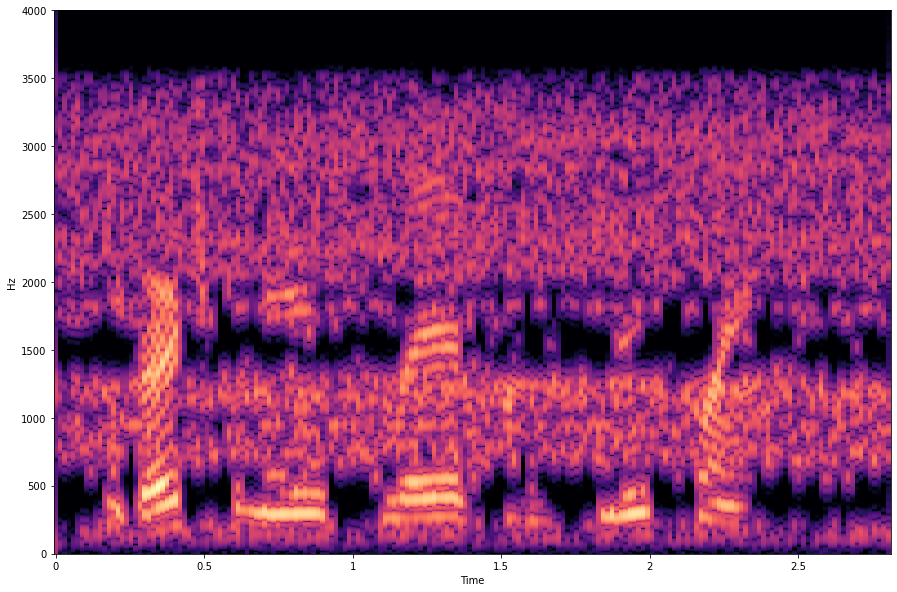

In [55]:
#range of frequencies of interest for speech signal. It can be any positive value, but should be a power of 2
freq_range = 2048

#window size: the number of samples per frame. Each frame is of 30ms
win_length = int(shat_f2 * 0.03)

#number of samples between two consecutive frames by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

#windowing technique
window = 'hann'

shat_S2 = librosa.stft(np.float32(shat_s2),
                       n_fft = freq_range,
                       window = window,
                       hop_length = hop_length,
                       win_length = win_length)

plt.figure(figsize = (15, 10))

#convert the amplitude to decibels, just for illustration purpose
shat_Sdb2 = librosa.amplitude_to_db(abs(shat_S2))

librosa.display.specshow(
    #spectrogram
    shat_Sdb2,
    
    #sampling rate
    sr = shat_f2,
    
    #label for horizontal axis
    x_axis = 'time',

    #presentation scale
    y_axis = 'linear',

    #hop_lenght
    hop_length = hop_length)

#### Spectral subtraction alogrithm - sp02_babble_sn5

In [56]:
noisy_data2 = AudioSegment.from_wav('NoisySignal/Babble/sp02_babble_sn5.wav')
d2 = noisy_data2.get_array_of_samples() # samples d(t)
d_f2 = noisy_data2.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides

#window size: the number of samples per frame each frame is of 30ms
win_length = int(d_f2 * 0.03)

#number of samples between two consecutive frames by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

D2 = librosa.stft(np.float32(d2),
                 n_fft = 2048,
                 window = 'hann',
                 hop_length = hop_length,
                 win_length = win_length)

mag_D2 = abs(D2)
square_mag_D2 = mag_D2 * mag_D2

In [57]:
means_square_mag_D2 = np.mean(square_mag_D2, axis = 1)

In [58]:
H2 = np.zeros((mag_Y.shape[0], mag_Y.shape[1]), np.float32)
for k in range(H2.shape[0]):
    for t in range(H2.shape[1]):
        H2[k][t] = np.sqrt(max(0, 1 - means_square_mag_D2[k] / (mag_Y[k][t] * mag_Y[k][t])))

In [59]:
S_hat2 = H2 * Y

In [60]:
win_length = int(y_f * 0.03)
hop_length = int(win_length / 2)
s_hat2 = librosa.istft(S_hat2, win_length = win_length, hop_length = hop_length, length = len(y))

In [61]:
s_hat_truncated2 = np.float16(s_hat2)
for i, num in enumerate(s_hat_truncated2):
    if num > 32767:
        s_hat_truncated2[i] = 32767
    elif num < -32768:
        s_hat_truncated2[i] = -32768

In [62]:
data2 = array.array('h', s_hat_truncated2)

<ipython-input-62-b344b5c1d593>:1: DeprecationWarning: an integer is required (got type numpy.float16).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  data2 = array.array('h', s_hat_truncated2)


In [63]:
data_audio2 = AudioSegment(
    #raw data
    data = data2,
    
    #2 bytes = 16 bit samples
    sample_width = 2,
    
    #frame rate
    frame_rate = y_f,
    
    #channels = 1 for mono and 2 for stereo
    channels = 1)

data_audio2.export('sp02_babble_sn5_spectralsubtraction.wav', format = 'wav')

<_io.BufferedRandom name='sp02_babble_sn5_spectralsubtraction.wav'>

In [64]:
shat_s2 = data_audio2.get_array_of_samples() # samples x(t)
shat_f2 = data_audio2.frame_rate

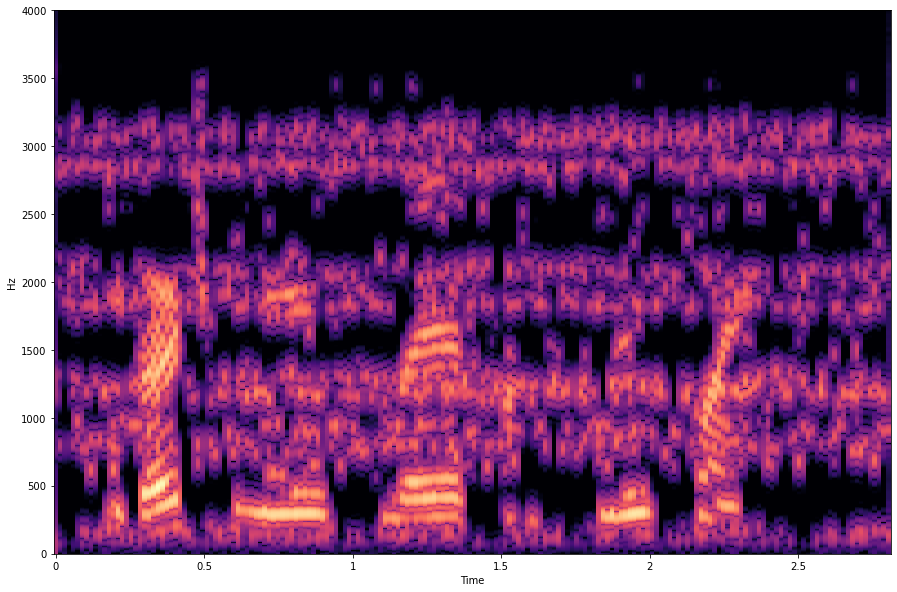

In [65]:
#range of frequencies of interest for speech signal. It can be any positive value, but should be a power of 2
freq_range = 2048

#window size: the number of samples per frame. Each frame is of 30ms
win_length = int(shat_f2 * 0.03)

#number of samples between two consecutive frames by default, hop_length = win_length / 4
hop_length = int(win_length / 2)

#windowing technique
window = 'hann'

shat_S2 = librosa.stft(np.float32(shat_s2),
                       n_fft = freq_range,
                       window = window,
                       hop_length = hop_length,
                       win_length = win_length)

plt.figure(figsize = (15, 10))

#convert the amplitude to decibels, just for illustration purpose
shat_Sdb2 = librosa.amplitude_to_db(abs(shat_S2))

librosa.display.specshow(
    #spectrogram
    shat_Sdb2,
    
    #sampling rate
    sr = shat_f2,
    
    #label for horizontal axis
    x_axis = 'time',

    #presentation scale
    y_axis = 'linear',

    #hop_lenght
    hop_length = hop_length)